## Importations :

In [17]:
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
import splitfolders

In [16]:
import tensorflow as tf
from keras import layers, models
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input

## Data preparation :

In [18]:
#Split Dataset into 3 folders (train, test and validation)
splitfolders.ratio('./3IDL_DataSet/', output="Output_DataSet", seed=1337, ratio=(0.6,0.2,0.2))

ValueError: The provided input folder "./3IDL_DataSet/" does not exists. Your relative path cannot be found from the current working directory "/Users/layouni/Desktop/YassineISI/3 ING/Projet AI/Projet-AI-Covid".

In [27]:
# Set the path to your dataset directory
path_dataset = './Output_DataSet'

# Define parameters
img_dim =256
batch_size = 32

# Data augmentation and training preparation
train_data = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train = train_data.flow_from_directory(
    os.path.join(path_dataset, 'train'),
    target_size=(img_dim, img_dim),
    batch_size=batch_size,
    class_mode='categorical'
)

# Data rescaling
test_data = ImageDataGenerator(rescale=1./255)

#  Validation data preparation
validation = test_data.flow_from_directory(
    os.path.join(path_dataset, 'val'),
    target_size=(img_dim, img_dim),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 3136 images belonging to 3 classes.
Found 1045 images belonging to 3 classes.


## Building the Model :

In [ ]:
# Build the CNN model
# Create a Sequential model
model = Sequential()
# Add the first convolutional layer with 32 filters and size 3x3
model.add(Conv2D(32, (3, 3), input_shape=(img_dim, img_dim, 3), activation='relu'))
# Add max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add the second convolutional layer with 64 filters and size 3x3
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add the third convolutional layer with 128 filters and size 3x3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Flatten the output from the previous layer into a one-dimensional array.
model.add(Flatten())

# Add a dense layer with 256 units and ReLU activation
model.add(Dense(256, activation='relu'))

# Add a dropout layer with a dropout rate of 0.5
model.add(Dropout(0.5))

# Add the output layer with 3 units (one unit per class) and softmax activation
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Display the model summary
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)     

## Training the Model :

Epoch 1/10


98/98 [==============================] - 614s 6s/step - loss: 0.6821 - accuracy: 0.7302 - val_loss: 0.3646 - val_accuracy: 0.8770
Epoch 2/10
98/98 [==============================] - 469s 5s/step - loss: 0.4314 - accuracy: 0.8412 - val_loss: 0.2673 - val_accuracy: 0.9150
Epoch 3/10
98/98 [==============================] - 516s 5s/step - loss: 0.3546 - accuracy: 0.8712 - val_loss: 0.2855 - val_accuracy: 0.8838
Epoch 4/10
98/98 [==============================] - 517s 5s/step - loss: 0.3268 - accuracy: 0.8798 - val_loss: 0.2872 - val_accuracy: 0.8906
Epoch 5/10
98/98 [==============================] - 523s 5s/step - loss: 0.3087 - accuracy: 0.8925 - val_loss: 0.2373 - val_accuracy: 0.9238
Epoch 6/10
98/98 [==============================] - 469s 5s/step - loss: 0.3009 - accuracy: 0.8919 - val_loss: 0.2207 - val_accuracy: 0.9268
Epoch 7/10
98/98 [==============================] - 421s 4s/step - loss: 0.2623 - accuracy: 0.8973 - val_loss: 0.1758 - val_accuracy: 0.9453
Epoch 8/10


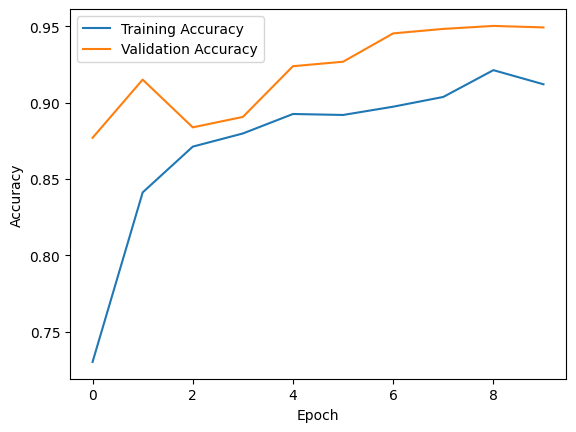

In [ ]:

# Training the model using the fit method
history = model.fit(train, steps_per_epoch=train.samples // batch_size,
                    epochs=10,
                    validation_data=validation,validation_steps=validation.samples // batch_size )

# Plot training history per epochs (iteration)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



## Saving the Model :

In [ ]:
# Save the model into (HDF5)
model.save('classifier_model.h5')

## Testing the Model :

1/1 [==============================] - 0s 26ms/step
Predicted class: Pneumonia


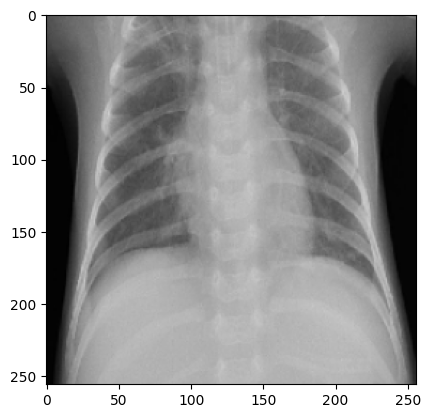

In [14]:
# Load a sample image from the testset for a prediction
test_img = './Test/PNEUMONIA_899.png'

# Load the imag
img = image.load_img(test_img, target_size=(256, 256))

#Convert the image to a NumPy array
img_array = image.img_to_array(img)

# Expand the dimensions of the image
img_array = np.expand_dims(img_array, axis=0)

# Rescale the pixel values to be in the range [0, 1]
img_array /= 255.0

#Show the image
plt.imshow(img)

#Predict the image class
predictions = model.predict(img_array)

#  Class labels
labels = ['COVID', 'Normal', 'Pneumonia']

# Display the predicted class
predicted_class = labels[np.argmax(predictions)]
print(f"Predicted class: {predicted_class}")

## Evaluation on the test dataset :

Found 1047 images belonging to 3 classes.


/var/folders/ql/0dxj_4gd1xv51_9lszv8p_9m0000gn/T/ipykernel_95632/2653274727.py:28: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  evaluation = model.evaluate_generator(test_generator)


Loss: 0.151426300406456
Accuracy: 0.9512894153594971


/var/folders/ql/0dxj_4gd1xv51_9lszv8p_9m0000gn/T/ipykernel_95632/2653274727.py:36: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model.predict_generator(test_generator)


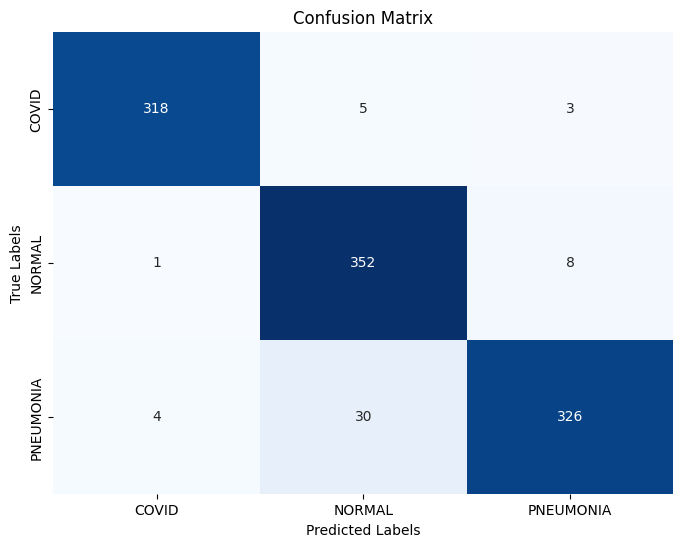

              precision    recall  f1-score   support

       COVID       0.98      0.98      0.98       326
      NORMAL       0.91      0.98      0.94       361
   PNEUMONIA       0.97      0.91      0.94       360

    accuracy                           0.95      1047
   macro avg       0.95      0.95      0.95      1047
weighted avg       0.95      0.95      0.95      1047



In [46]:
import scipy
from sklearn.metrics import confusion_matrix, classification_report 
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer

# Set the path to your dataset directory
path_dataset = './Output_DataSet'

# Define parameters
img_dim = 256
batch_size = 32

# Load pre-trained model
model = load_model('./classifier_model.h5')

# Data rescaling
test_data_generator = ImageDataGenerator(rescale=1./255)

#  Testing data preparation
test_generator = test_data_generator.flow_from_directory(
    os.path.join(path_dataset, 'test'),
    target_size=(img_dim, img_dim),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle= False
)

evaluation = model.evaluate_generator(test_generator)

# Print the evaluation results
print("Loss:", evaluation[0])
print("Accuracy:", evaluation[1])


#Confution Matrix and Classification Report
y_pred = model.predict_generator(test_generator)
# Get predictions and true labels

y_true = test_generator.classes

# Convert probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute confusion matrix
conf_mat = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))

